In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib notebook

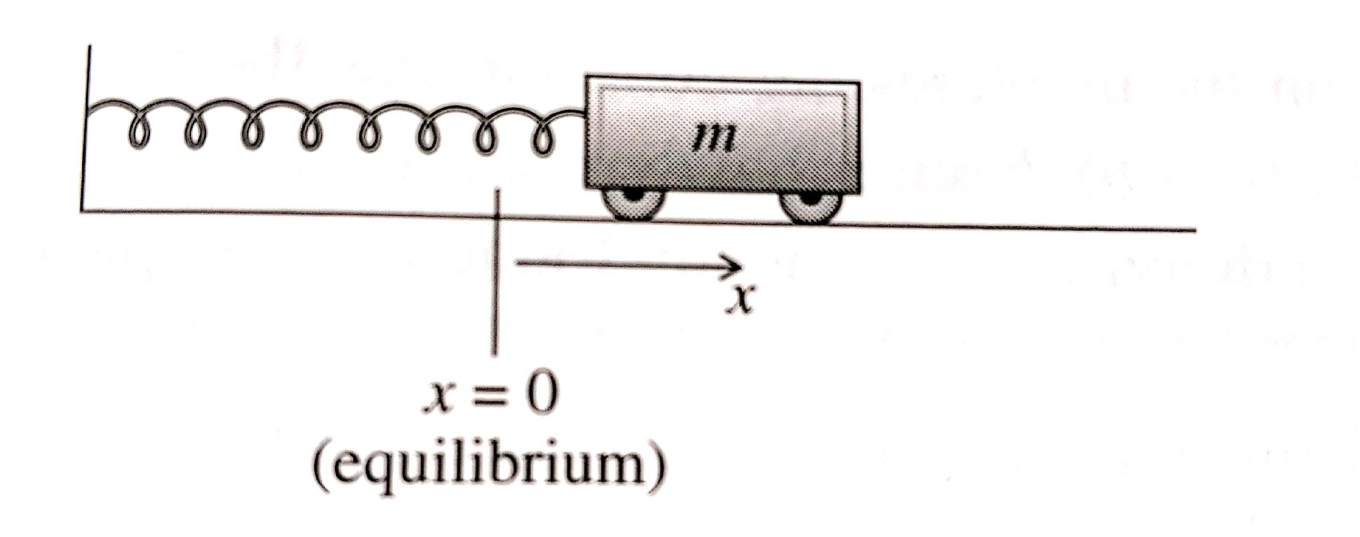

For initial conditions at time $ t= 0$: 
* $v_0 = 0$
* $x_0 = 1\;m$

## $ma = -kx$ 
## We can rewrite this as:
## * $\frac{dx}{dt} = v$
## * $\frac{dv}{dt} = -\frac{k}{m}x$

We will take $k = 1\; N/m, \; m = 1\; kg$

$x(t) = x_0 \cos(\omega t)$

In [2]:
#Spring Constant (N/m)
k = 1.0

#Mass (kg)
m = 1.0

#Initial Conditions [position (m), velocity (m/s)]
x0 =  np.array([1.0, 1.0])
t0 = 0 #s
tf = 15 #s
n = 100
t1 = np.linspace(t0, tf, n)

#print(t1)

In [3]:
def simple_harmonic_motion(t, x, k, m):
    '''t is a numpy array
       x is a numpt array
       k is the spring constant
       m is the cart mass'''
    dx_dt = x[1]
    dv_dt = -k/m * x[0]
    return np.array([dx_dt, dv_dt])

# Runge-Kutta Method of Order 1 a.k.a. The Euler Method

The solution is approximated as

## $$y_{n+1} = y_{n} + (t_{n+1}-t_n) f(t_n,y_n)$$

In [4]:
def rungekutta_1(f, t, x0, args=()):
    n = len(t) #amount of steps we want to take
    x = np.zeros((n,len(x0)))
    x[0] = x0
    for i in range (0, n-1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * f(t[i], x[i], *args)
    return x

#We will have to pass this function a list of args, here it would be b,c
# *args refres to the address of where we defined args, so it picks up all listed 
# quantities in args

In [5]:
sol_rk1 = rungekutta_1(simple_harmonic_motion, t1, x0, args=(k,m)) #args order matters! they must match our equaton function order

#really an Nx2 e.g sol_rk1[N,2]
print(sol_rk1[:,0])

[ 1.          1.15151515  1.28007346  1.38219662  1.45493334  1.49593919
  1.50354436  1.4768075   1.41555401  1.32039768  1.1927447   1.03477957
  0.84943278  0.64033073  0.41172838  0.16842605 -0.08432825 -0.34094908
 -0.59563401 -0.84249182 -1.07567575 -1.28951873 -1.4786676  -1.63821319
 -1.76381324 -1.85180509 -1.89930537 -1.90429404 -1.86568067 -1.78335072
 -1.65819063 -1.49209045 -1.28792344 -1.04950276 -0.78151542 -0.48943481
 -0.17941307  0.14184454  0.46722091  0.78934097  1.10073512  1.3940085
  1.66201247  1.89801441  2.0958618   2.25013677  2.35629737  2.41080194
  2.41121337  2.3562804   2.24599359  2.08161402  1.86567353  1.60194577
  1.29538803  0.95205468  0.5789833   0.18405577 -0.2241634  -0.6366079
 -1.04390633 -1.43659024 -1.80530936 -2.14104891 -2.43534426 -2.68048789
 -2.86972371 -2.99742399 -3.05924448 -3.05225359 -2.97503211 -2.82774052
 -2.6121516  -2.33164668 -1.99117502 -1.59717611 -1.15746612 -0.68109001
 -0.17814213  0.34044143  0.86311456  1.37797224  1.8

<IPython.core.display.Javascript object>


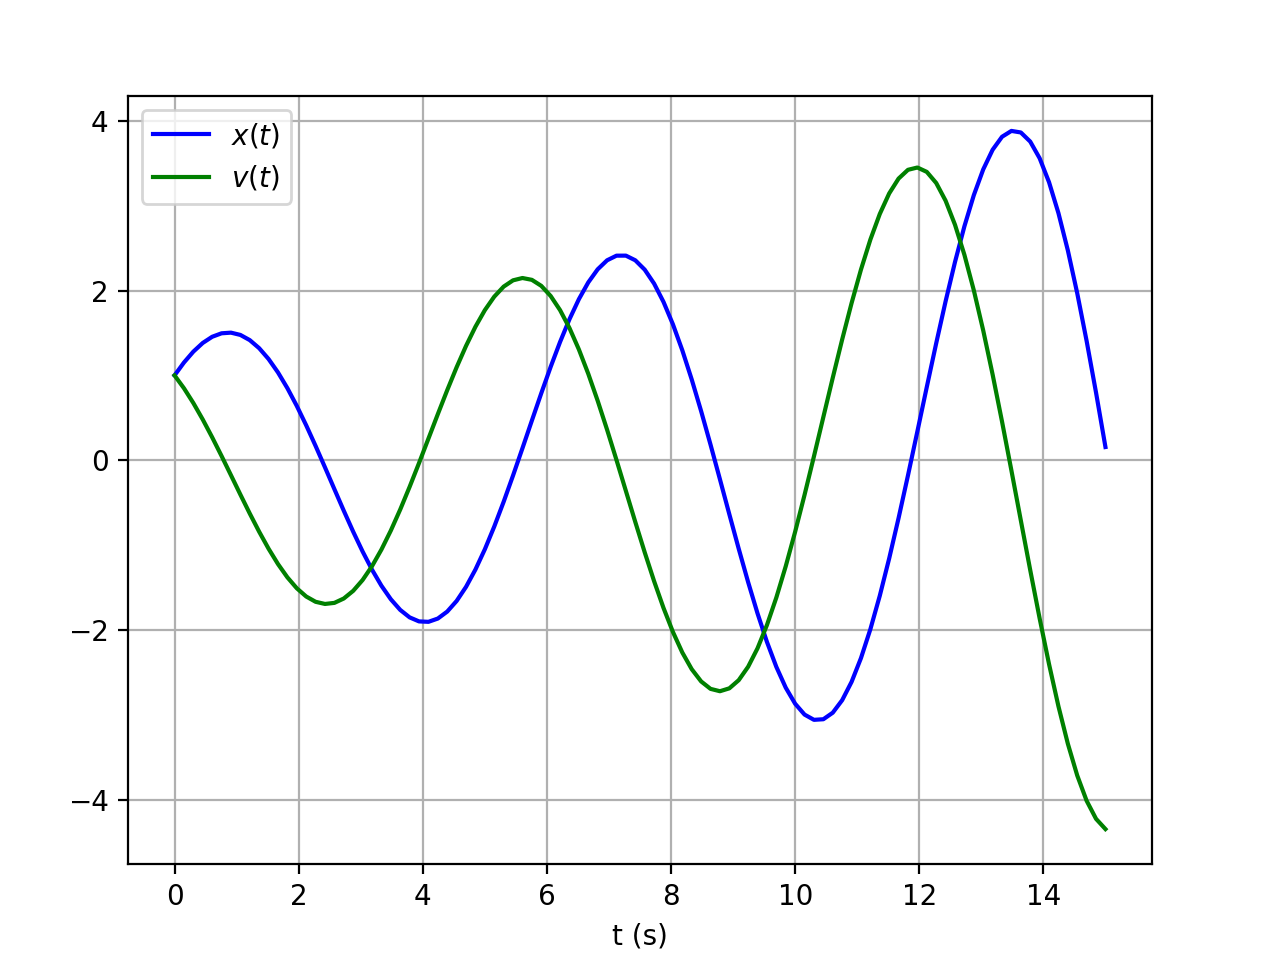

In [6]:
fig = plt.figure('Runge-Kutta 1')
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#draw x and v
ax.plot(t1,sol_rk1[:,0],'b', label=r'$x(t)$')
ax.plot(t1,sol_rk1[:,1],'g', label=r'$v(t)$')


ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.grid()

## In Class Problem
### <span style="color:red">What if we reduce our step size?</span>

Keeping the same initial (t0) and end times (tf) increase the number of evaluation points (n) to 1,000. We sill call this time array t2.

Complete the code below to evaluate the solution using the t2 array instead of t1.

In [7]:
t2 = np.linspace(t0, tf, 1000)
sol_rk2 = rungekutta_1(simple_harmonic_motion, t2, x0, args=(k,m))

Let's reduce the step size even more. Keeping the same initial (t0) and end times (tf) increase the number of evaluation points (n) to 10,000. We sill call this time array t3.

Complete the code below to evaluate the solution using the t3 array instead of t1.

In [8]:
t3 = np.linspace(t0, tf, 10000)
sol_rk3 = rungekutta_1(simple_harmonic_motion, t3, x0, args=(k,m))

## Comparing the solutions 

<IPython.core.display.Javascript object>


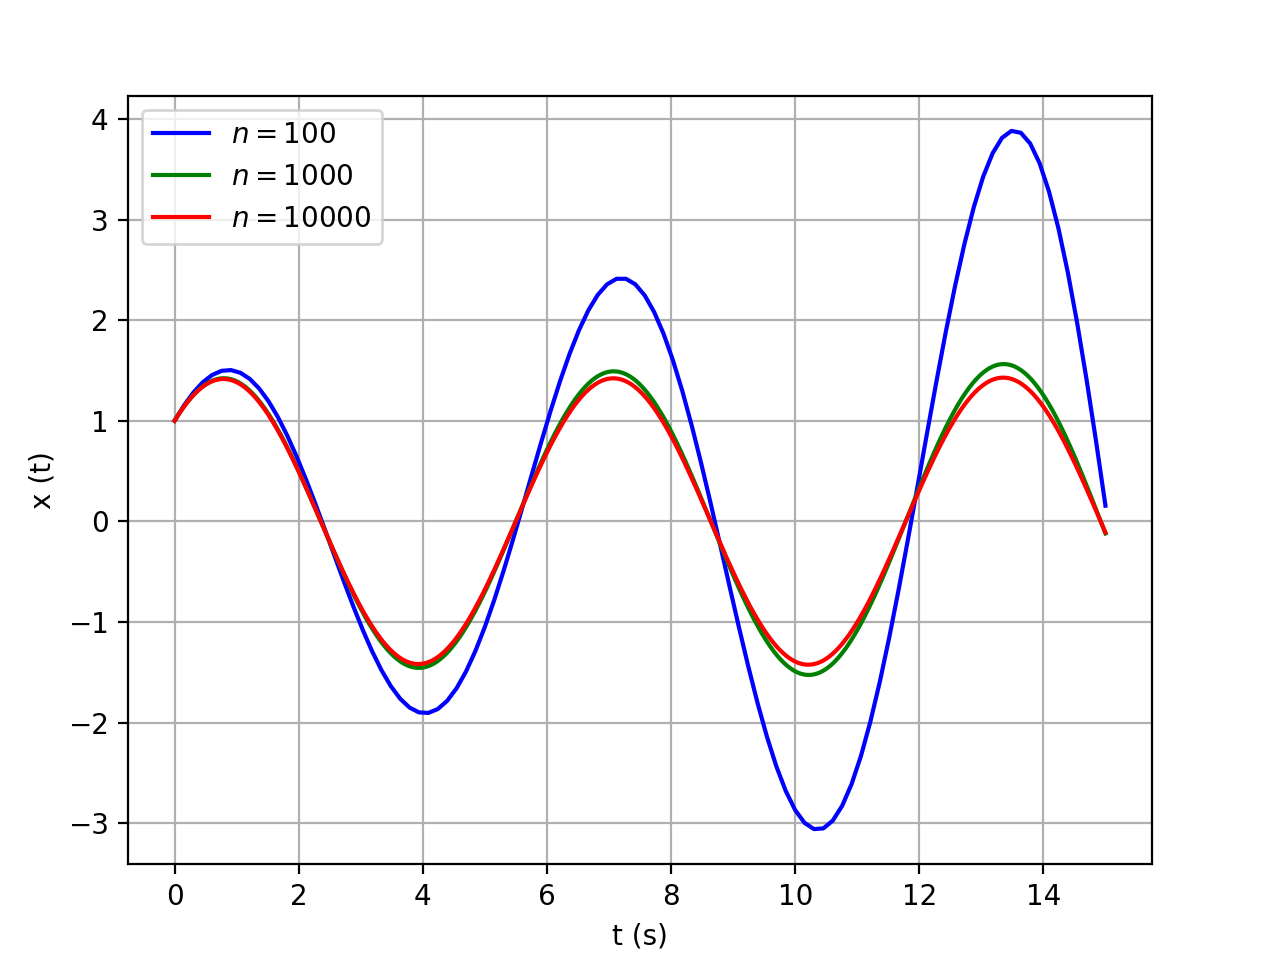

In [9]:
fig = plt.figure('Runge-Kutta Step Size')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(t1,sol_rk1[ :,0],'b', label=r'$n = 100$')
ax.plot(t2,sol_rk2[ :,0], 'g', label=r'$n = 1000$')
ax.plot(t3,sol_rk3[ :,0], 'r', label=r'$n = 10000$')
ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.set_ylabel('x (t)')
ax.grid();

# Runge-Kutta Method of Order 2

The solution is approximated by 

## $$ y_{n+1} = y_{n} + \Delta t k_2$$

Where 

## * $\Delta t = t_{n+1} - t_n$
## * $k_1 = f(t_n,y_n) $
## * $k_2 = f(t_n + \frac{\Delta t}{2},y_n +\frac{\Delta t}{2}k_1 )$

### <span style="color:red"> Complete the implimentation of the 2nd order Runge-Kutta Method below

In [10]:
def rungekutta_2(f, t, x0, args=()):
    n = len(t)
    x = np.zeros( ( n, len(x0) ) )
    x[0] = x0 #set inital condition 
    
    for i in range (0,n-1):      
        dt = t[i+1] - t[i]
        k1 = f(t[i], x[i], *args)
        k2 = f(t[i] + dt/2, x[i] + (dt/2)*k1, *args)
        x[i+1] = x[i] +dt*k2   
        
    return x

In [11]:
sol_rk2_1 = rungekutta_2(simple_harmonic_motion,t1,x0,args=(k,m)) #args order matters! they must match our equaton function order

t2 = np.linspace(t0,tf,1000)
sol_rk2_2 = rungekutta_2(simple_harmonic_motion,t2,x0,args=(k,m)) #args order matters! they must match our equaton function order

t3 = np.linspace(t0,tf,10000)
sol_rk2_3 = rungekutta_2(simple_harmonic_motion,t3,x0,args=(k,m)) #args order matters! they must match our equaton function order


<IPython.core.display.Javascript object>


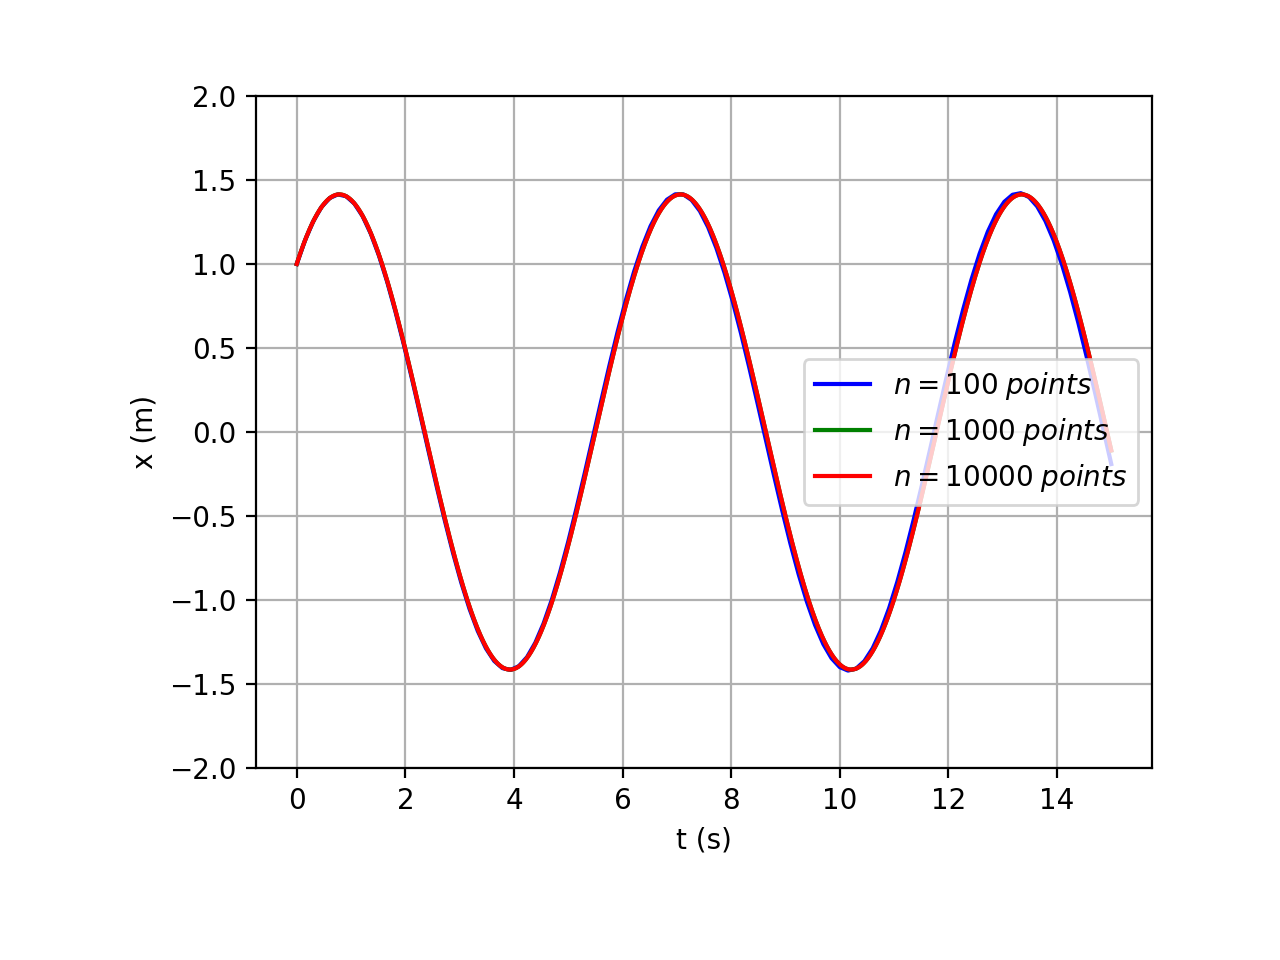

In [12]:
fig = plt.figure("n Comparison (RK2)")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.plot(t1,sol_rk2_1[ :,0],'b', label=r'$n = 100\; points$')
ax.plot(t2,sol_rk2_2[ :,0], 'g', label=r'$n = 1000\; points$')
ax.plot(t3,sol_rk2_3[ :,0], color='r', label=r'$n = 10000\; points$')

ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.set_ylabel('x (m)')
plt.ylim(-2,2)
plt.grid()

# Compare to Scipy

In [13]:
sol_RK45 = integrate.solve_ivp(simple_harmonic_motion, (t0,tf), x0, method='RK45', t_eval=t1, args=(k,m))
sol_RK23 = integrate.solve_ivp(simple_harmonic_motion, (t0,tf), x0, method='RK23', t_eval=t1, args=(k,m))

print(sol_RK45)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.515e-01 ...  1.485e+01  1.500e+01]
        y: [[ 1.000e+00  1.140e+00 ...  9.845e-02 -1.156e-01]
            [ 1.000e+00  8.376e-01 ... -1.411e+00 -1.409e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 104
     njev: 0
      nlu: 0


<IPython.core.display.Javascript object>


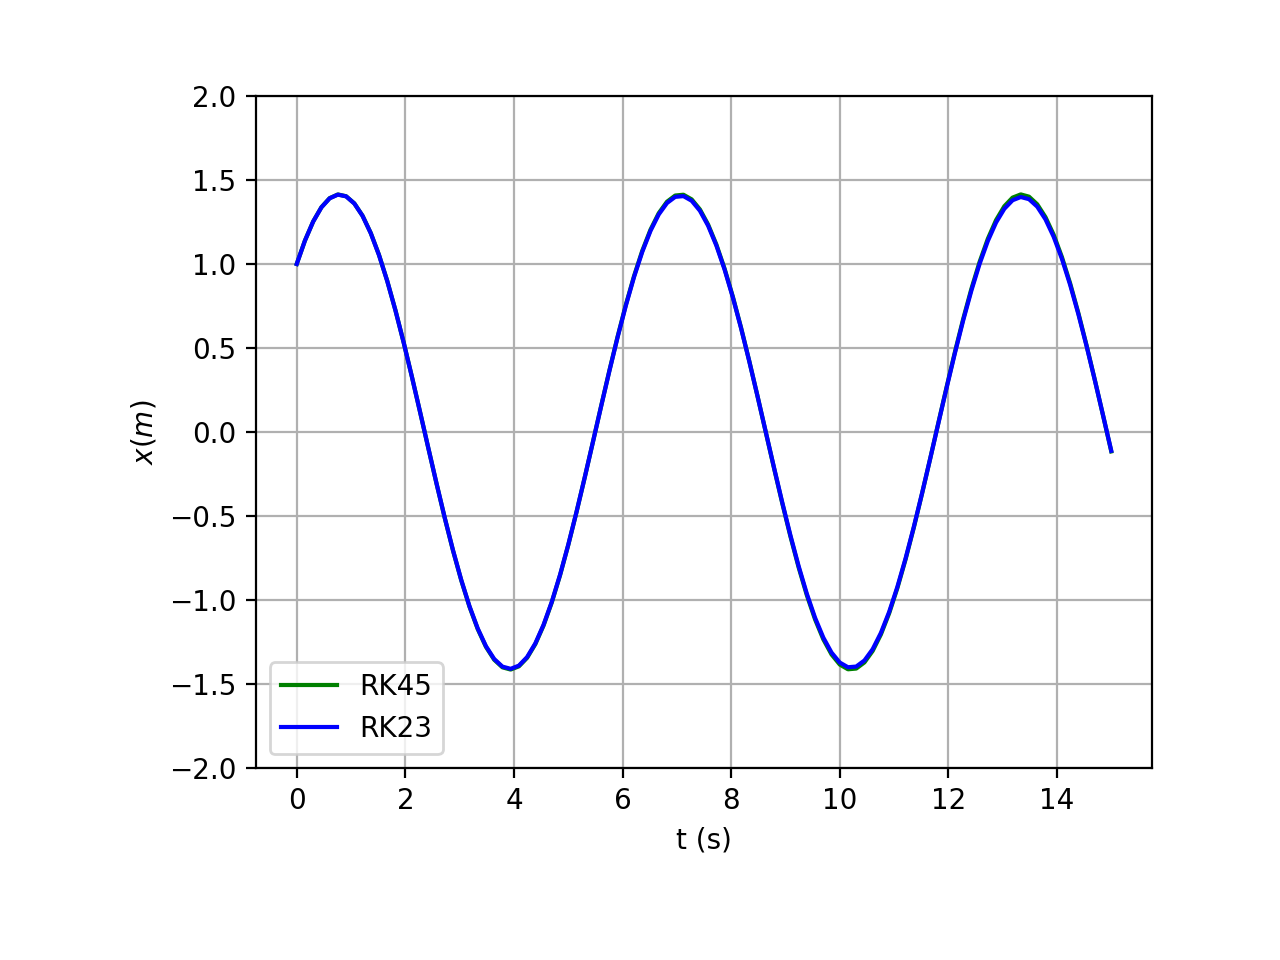

In [14]:
fig = plt.figure("Scipy)")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

#draw curves
ax.plot(t1,sol_RK45.y[0],'g',label='RK45')
ax.plot(t1,sol_RK23.y[0],'b',label='RK23')


ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.set_ylabel(r'$x (m)$')
plt.ylim(-2,2)
ax.grid();

# Adding Friction - Damped Oscillations

## $ma = -kx \bf{- cv}$ 
We can rewrite this as:
## * $v = \frac{dx}{dt}$
## * $\frac{dv}{dt} = -\frac{k}{m}x - \frac{c}{m}v$

General solution is: 
## $$x(t) = Ae^{-(\frac{c}{2m})t}\cos(\omega t + \phi_0)$$

Has exponential decay term multiplying the oscillatory function

## In Class Problem
### <span style="color:red">Compete the function below to include the friction term</span>

In [15]:
def shm_friction(t,x,k,m,c):
    '''t is a numpy array
       x is a numpt array
       k is the spring constant
       m is the cart mass
       c is a constant for air resistance'''
    
    dx_dt = x[1]
    dv_dt = (-k/m * x[0]) - (c/m * dx_dt)
    
    return np.array([dx_dt, dv_dt])
    
   

In [16]:
k = 1 #N/m
m = 1 #kg
c = 0.08 #kg/s

#initial conditions
x0 = np.array([1.0,0.0]) #[m, m/s]

t0 = 0 #s
tf = 60 #s
n = 100
t = np.linspace(t0,tf,n)

env = x0[0]*np.exp(-c*t/(2*m))

In [17]:
sol_RK45_friction = integrate.solve_ivp(shm_friction,(t0,tf),x0,method='RK45', t_eval=t, args = (k,m,c))

<IPython.core.display.Javascript object>


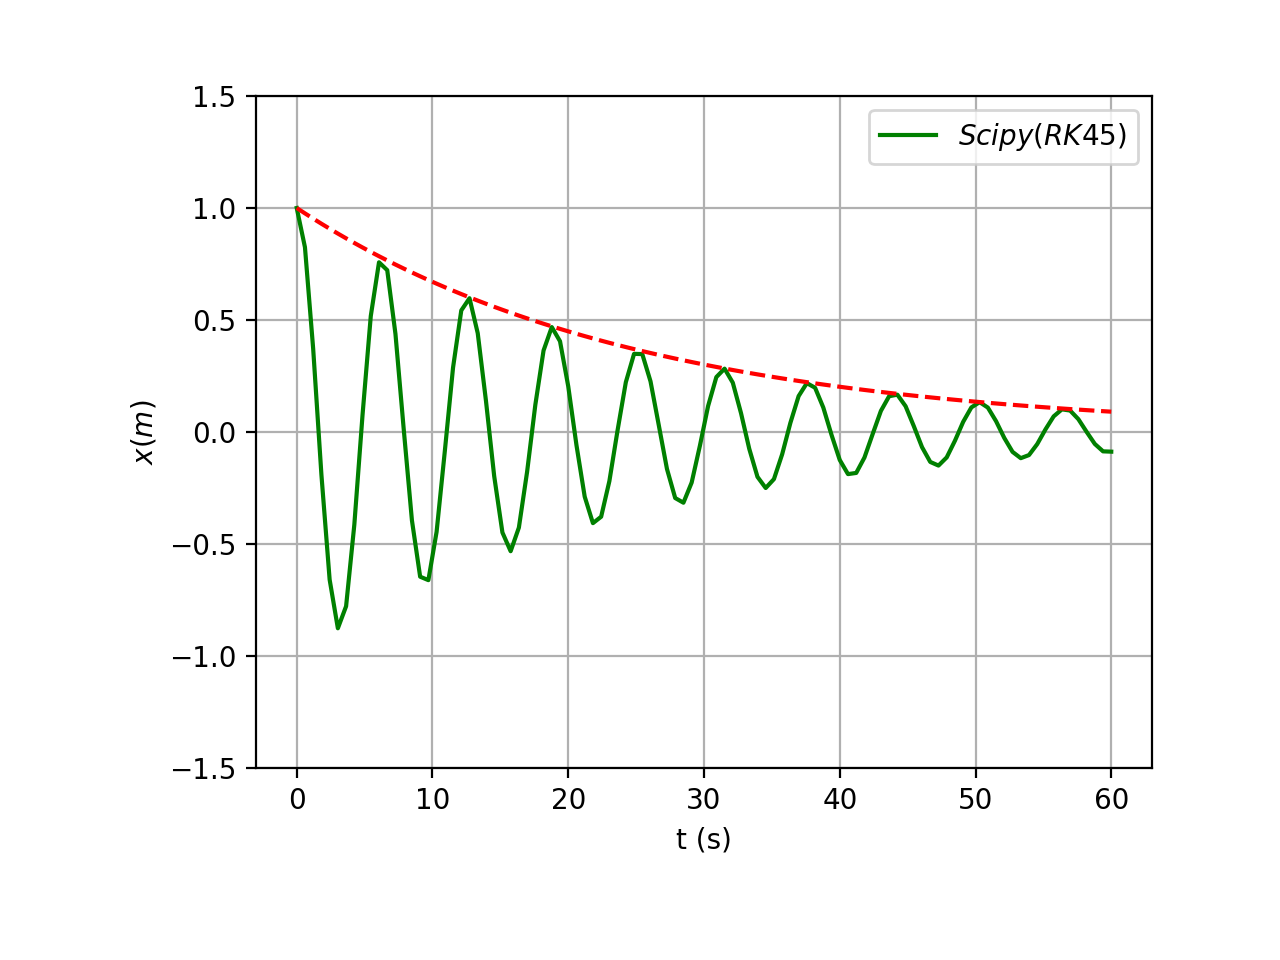

In [18]:
fig = plt.figure("SHM with Friction)")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.plot(t,sol_RK45_friction.y[0],'g', label=r'$Scipy (RK45)$')
ax.plot(t,env,'r--', label='')

ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.set_ylabel(r'$x (m)$')
plt.ylim(-1.5,1.5)
ax.grid()